# Counterfeit detection

The task in this assignment is to detect the  counterfeit banknotes. The data set is based on [banknote authentication Data Set ](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#) from UCI Machine Learning repository. The first three columns denote different parameters obtained from the photographs of the banknotes and last colum provides the label. Frankly as the dataset does not have any description I don't know  which labels corresponds to real and which to counterfeited banknotes. let's assume that label one (positive) denotes the clounterfeits. The set  "banknote_authentication.csv" can be found in the data  directory.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scrapbook as sb
import sklearn

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.mixture import GaussianMixture


In [181]:
data = pd.read_csv('data/banknote_authentication.csv')
sb.glue('person',['Łukasz', 'Lik'], display=True)

['Łukasz', 'Lik']

In [182]:
data.head()

,a1,a2,a3,counterfeit
0,12.3784,0.70403,-7.58360,0
1,8.1881,-3.13380,-2.52760,0
2,-10.8679,9.49260,-1.41160,1
3,-8.7903,7.97350,-0.45475,1
4,-5.5167,10.93900,-0.40820,1


In [183]:
values = data[['a1', 'a2', 'a3']]
labels = data['counterfeit']

# print (labels)

In [184]:
# x = data[['a1', 'a2', 'a3']][:750]
# y = data['counterfeit'][:750]
# x_test = data[['a1', 'a2', 'a3']][750:]
# y_test = data['counterfeit'][750:]
data_train, data_test = train_test_split(data,test_size=0.2, stratify = data['counterfeit'])

x, x_test, y, y_test = train_test_split(values, labels, test_size=0.2)

x0 = x[y == 0]
x1 = x[y == 1]


print(x0)
print(x1)
# print(x_test)
# print(y_test)

            a1      a2        a3
1023   7.63360 -1.9427 -0.374580
832   10.18910 -3.9323 -4.182700
1090  -3.91720  3.9746  0.361190
968    9.22070 -3.7044 -6.810300
19     3.73300  0.6312 -0.397860
...        ...     ...       ...
378    1.84790  3.1375  0.428430
853   -0.56078  7.7215  0.453000
418    5.68020 -1.9693  0.026279
830   -5.30360  3.8803 -0.704320
193   10.58850 -3.7250 -4.313300

[491 rows x 3 columns]
          a1         a2       a3
60  -6.08160  10.095800 -1.01470
398  3.63570  -4.404400 -4.14140
361  3.86540  -0.333600 -1.27970
441 -0.95602   2.707300 -0.16639
834  2.14380  -0.472410 -1.66770
..       ...        ...      ...
133 -5.82300   5.869900  1.21200
467 -6.63830   5.749100 -0.10691
910 -6.22850  10.238900 -1.15430
675  1.59330   0.045122 -1.67800
76   1.89550   0.186500 -2.44090

[386 rows x 3 columns]


## Problem 

### A.

Perform the Quadratic Discriminant Analysis on this set. Calculate the confusion matrix, AUC score and plot the ROC curve. Please use `scrapbook` to store your results. 

In [185]:
def analizer(cls, x, y, x_test, y_test):
    cls.fit(x,y)
    pred = cls.predict(x_test)
    proba = cls.predict_proba(x_test)[:,1]
    
    tnr, fpr, fnr, tpr = confusion_matrix(y_test, pred, normalize='true').ravel()
    prec = precision_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, proba)
    fprs, tprs, thds = roc_curve(y_test, proba)
    
    return  pd.DataFrame({'tnr':[tnr], 'fpr':[fpr], 'fnr':[fnr],
                      'tpr':[tpr], 'precision' : [prec], 'f1' :[f1],
                      'auc' :[auc]}), fprs, tprs, thds
    

In [186]:
qda = sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()
df, fprs, tprs, thds = analizer(qda, x, y, x_test, y_test)
proba = qda.predict_proba(x_test)[:,1]

roc = [fprs, tprs, thds]
print(roc[0])

[0.         0.         0.         0.01694915 0.01694915 0.02542373
 0.02542373 0.04237288 0.04237288 0.05084746 0.05084746 0.05932203
 0.07627119 0.07627119 0.08474576 0.08474576 0.09322034 0.09322034
 0.11864407 0.11864407 0.12711864 0.12711864 0.1440678  0.1440678
 0.15254237 0.15254237 0.16101695 0.16101695 0.1779661  0.1779661
 0.19491525 0.19491525 0.20338983 0.20338983 0.22033898 0.22033898
 0.22881356 0.22881356 0.23728814 0.23728814 0.24576271 0.24576271
 0.25423729 0.25423729 0.26271186 0.26271186 0.29661017 0.29661017
 0.30508475 0.30508475 0.33898305 0.33898305 0.78813559 0.78813559
 1.        ]


also please save the ROC plot

,tnr,fpr,fnr,tpr,precision,f1,auc
0,0.805085,0.194915,0.284314,0.715686,0.760417,0.737374,0.870306


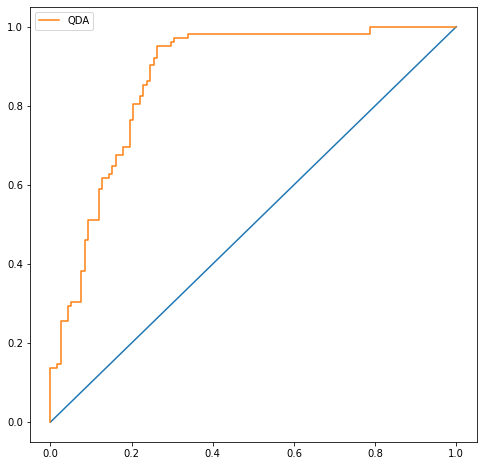

In [187]:
fig, ax = plt.subplots(figsize=(8,8))
#plot ROC
ax.plot([0,1],[0,1]);
ax.plot(roc[0],roc[1], label="QDA");
ax.legend()

sb.glue('A_scores', df, display=True)
sb.glue('A_ROC',fig, "display", display=False);

### B.

Perform Gaussian Mixture Discriminant Analysis on this set as described in the `gaussian_mixture_model_EM_algorithm` notebook. Use two components for positives and two components for negatives. Calculate the confusion matrix, AUC score and plot the ROC curve. 

In [188]:
lab0 = GaussianMixture(n_components=2, max_iter=100, tol=0.0001) 
lab1 = GaussianMixture(n_components=2, max_iter=100, tol=0.0001) 

lab0.fit(x0)
lab1.fit(x1)

print(lab0.weights_)  #pi
print(lab0.means_)    #mu
print(lab0.covariances_) #Sigma (covariance) matrices
# print(lab0.precisions_)

[0.4698762 0.5301238]
[[-0.52155345  3.20350923  0.34700502]
 [ 8.29732631 -1.23330731 -2.33420064]]
[[[ 9.68301474 -4.36277293  1.20632492]
  [-4.36277293  6.88313804 -1.14103321]
  [ 1.20632492 -1.14103321  0.80382931]]

 [[ 3.6757094  -0.69018043 -3.09095834]
  [-0.69018043  4.0689172   0.48946172]
  [-3.09095834  0.48946172  4.12212009]]]


In [189]:
def make_pdf(cmp):
    """
    Takes a GaussianMixture object and returns corresponding
    probability distribution function
    """
    n_cmp = cmp.n_components
    dists = [st.multivariate_normal(cmp.means_[i], cmp.covariances_[i]) for i in range(n_cmp)]
    def pdf(x):
        p = 0.0
        for i in range(n_cmp):
            p+= cmp.weights_[i]*dists[i].pdf(x)
        return p
    
    return pdf
    
    
def make_predict_proba(cmp0, cmp1, pi0=0.5, pi1=.5):
    """
    Takes two GaussianMixture object and corresponding priors and returns 
    pdf for conditional probability P(c=1|x)
    """
    pdf0 = make_pdf(cmp0)
    pdf1 = make_pdf(cmp1)
    def p(x):
        p0=pi0*pdf0(x)
        p1=pi1*pdf1(x)
        return p1/(p1+p0)    
        
    return p

In [190]:
mgd_predict_proba = make_predict_proba(lab0, lab1, 0.5, 0.5)

mgd_proba = mgd_predict_proba(x_test)

# confusion_matrix(y_test, mgd_proba>0.5, normalize='true')

g_fprs, g_tprs, g_thds = roc_curve(y_test, mgd_proba)

g_tnr, g_fpr, g_fnr, g_tpr = confusion_matrix(y_test, mgd_proba>0.5,normalize = 'true').ravel()
g_f1 = f1_score(y_test, mgd_proba>0.5)
g_precision = precision_score(y_test, mgd_proba>0.5)
g_auc = roc_auc_score(y_test, mgd_proba)
g_fprs, gm_tprs, gm_thds = roc_curve(y_test, mgd_proba)

also please save the ROC plot

[0.9322033898305084,
 0.06779661016949153,
 0.18627450980392157,
 0.8137254901960784,
 0.9120879120879121,
 0.8601036269430051,
 0.9572116982386174]

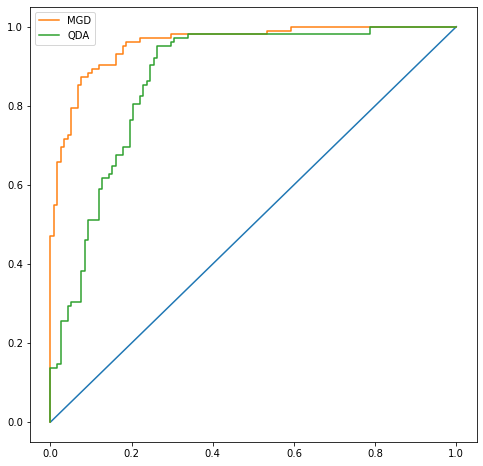

In [191]:
fig, ax = plt.subplots(figsize=(8,8))
#plot ROCs (for A and B problems)
ax.plot([0,1],[0,1]);
ax.plot(g_fprs, g_tprs, label="MGD");
ax.plot(roc[0],roc[1], label="QDA");
ax.legend()

sb.glue('B_scores',[g_tnr, g_fpr, g_fnr, g_tpr, g_precision, g_f1, g_auc], display=True)
sb.glue('B_ROC',fig, "display", display=False);

### C.

Use k-fold cross validation to find the optimal number of gaussian components for each class. As before calculate the confusion matrix, AUC score and plot the ROC curve for the best classifier. 

__Hint__ use the `StratifiedKFold` function from scikit-learn library to generate folds. 

In [192]:
def fit_gms(n_cmp_neg, n_cmp_pos, train, test, pi0, pi1):
    gm0 = GaussianMixture(n_components=n_cmp_neg)
    gm1 = GaussianMixture(n_components=n_cmp_pos)
    real_train_data = train[train['counterfeit']==0]
    counterfeit_train_data = train[train['counterfeit']==1]
    gm0.fit(real_train_data.loc[:, 'a1':'a3'])
    gm1.fit(counterfeit_train_data.loc[:, 'a1':'a3'])
    mga = make_predict_proba(gm0, gm1, pi0,pi1)
    proba_test = mga(test.loc[:, 'a1':'a3'])
    return f1_score(test['counterfeit'], proba_test>0.5)

In [ ]:
splits=3
skf = StratifiedKFold(n_splits=splits, shuffle=True)
cmps_range = (3, 20)
max_score = 0

for cmps0 in range(*cmps_range):
    for cmps1 in range(*cmps_range):
        f1 = 0.0
        for train_index, test_index in skf.split(data_train.loc[:, 'a1':'a3'], data_train['counterfeit']):
            f1 += fit_gms(cmps0, cmps1, data_train.iloc[train_index], data_train.iloc[test_index], 0.56, 0.44)/splits
        #print(cmps0,cmps1,f1)
        if(f1>max_score):
            max_score=f1
            opt_n_cmp = [cmps0,cmps1]

In [ ]:
print(max_score)
print(opt_n_cmp)

gm_0_opt = GaussianMixture(n_components=opt_n_cmp[0])
gm_1_opt = GaussianMixture(n_components=opt_n_cmp[1])

gm_0_opt.fit(x0)
gm_1_opt.fit(x1)

gm_opt_predict_proba = make_predict_proba(gm_0_opt, gm_1_opt, 0.5, 0.5)
gm_opt_test_proba = gm_opt_predict_proba(x_test)

gm_opt_tnr, gm_opt_fpr, gm_opt_fnr, gm_opt_tpr = confusion_matrix(y_test, gm_opt_test_proba>0.5,normalize = 'true').ravel()
gm_opt_auc = roc_auc_score(y_test, gm_opt_test_proba)
gm_opt_fprs, gm_opt_tprs, gm_opt_thds = roc_curve(y_test, gm_opt_test_proba)
gm_opt_f1 = f1_score(y_test, gm_opt_test_proba>0.5)
gm_opt_precision = precision_score(y_test, gm_opt_test_proba>0.5)

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
#plot ROC
ax.set_aspect(1)
ax.plot([0,1],[0,1]);
ax.plot(g_fprs, g_tprs, label="MGD");
ax.plot(roc[0],roc[1], label="QDA");
ax.plot(gm_opt_fprs, gm_opt_tprs, label="OPT".format('gm', gm_opt_auc))

sb.glue('C_scores',[gm_opt_tnr, gm_opt_fpr, gm_opt_fnr, gm_opt_tpr, gm_opt_precision, gm_opt_f1, gm_opt_auc], display=True)
sb.glue('C_ROC',fig, "display", display=False)

Store the results for the best estimator

also please save the ROC plot

## D.  

Assume that 1% of all the customers in your store presents a counterfeit 100PLN bill. If you accept the counterfeit bill you loose 100PLN. If you reject a valid bill,  you may loose the purchase, you estimate this loss as 15PLN on average. For each of the three classifiers find the threshold that minimises your losses and calculates the minimum loss for each classifier. Show the optimal classifiers points on the ROC curves.

In [ ]:
def score(fpr,fnr):
    fp_loss = fpr * 0.99 * 15
    fn_loss = fnr * 0.01 * 100
    return fp_loss+fn_loss

def find_optimal(fprs,tprs,thds):
    min_loss = 1
    index = 0
    for i in range(len(thds)):
            s=score(fprs[i], 1-tprs[i])
            if (s<min_loss):
                min_loss=s
                index=i
    tnr = 1 - fprs[index]
    fpr = fprs[index]
    fnr = 1 - tprs[index]
    tpr = tprs[index]
    threshold = thds[index]
    precision = precision_score(y_test, proba>threshold)
    f1 = f1_score(y_test, proba>threshold)
    auc = roc_auc_score(y_test, proba)
    return tnr, fpr, fnr, tpr, precision, f1, auc, min_loss, threshold

In [ ]:
tnr, fpr, fnr, tpr, precision, f1, auc, min_loss, threshold = find_optimal(fprs,tprs,thds)

sb.glue('D_A_scores',[tnr, fpr, fnr, tpr, precision, f1, auc, min_loss, threshold], display=True)

In [ ]:
gm_tnr, gm_fpr, gm_fnr, gm_tpr, gm_precision, gm_f1, gm_auc, gm_min_loss, gm_threshold = find_optimal(g_fprs,g_tprs,g_thds)

sb.glue('D_B_scores',[gm_tnr, gm_fpr, gm_fnr, gm_tpr, gm_precision, gm_f1, gm_auc, gm_min_loss, gm_threshold], display=True)

In [ ]:
gm_opt_tnr, gm_opt_fpr, gm_opt_fnr, gm_opt_tpr, gm_opt_precision, gm_opt_f1, gm_opt_auc, gm_opt_min_loss, gm_opt_threshold = find_optimal(
                                                                                                        gm_opt_fprs,gm_opt_tprs, gm_opt_thds)

sb.glue('D_C_scores',[gm_opt_tnr, gm_opt_fpr, gm_opt_fnr, gm_opt_tpr, gm_opt_precision, gm_opt_f1, gm_opt_auc, gm_opt_min_loss, gm_opt_threshold], display=True)

also please save the ROC plot

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
#plot ROCs
ax.plot([0, 1], [0, 1])

ax.plot(g_fprs, g_tprs, label="MGD");
ax.plot(roc[0],roc[1], label="QDA");
ax.plot(gm_opt_fprs, gm_opt_tprs, label="OPT".format('gm', gm_opt_auc))

ax.scatter([fpr],[tpr])
ax.scatter([ gm_fpr],[gm_tpr])
ax.scatter([gm_opt_fpr], [gm_opt_tpr])

ax.legend()
sb.glue('D_ROC',fig, "display", display=False)